In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DataAccident as data
import datetime

df = data.getData2018Merge()

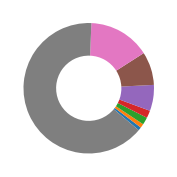

In [66]:
def name_plot():
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    dataGcat = df.groupby(['gcat']).Num_Acc_Id.count().sort_values(ignore_index = False)
    recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

    # data = [float(x.split()[0]) for x in recipe]
    ingredients = [x.split()[-1] for x in recipe]
   #  wedges, texts, autotexts = ax.pie(dataGcat.values, autopct=lambda pct: func(pct, dataGcat.values), textprops=dict(color="w"))
   # ax.legend(wedges, dataGcat.index,
    #          title="Type de véhicule",
    #          loc="center left",
    #          bbox_to_anchor=(1, 0, 0.5, 1))
    
    wedges, texts = ax.pie(dataGcat.values, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
         # ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw)
    
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)
name_plot()

dataAgglo = df.groupby(['agglo']).Num_Acc_Id.count()
explodeDataGcat = [0.25 for i in dataGcat]
    
    # plt.plot(dataGcat.values,dataGcat.index)
    # plt.plot(dataAgglo.values,dataAgglo.index)
    # plt.pie(dataAgglo.values, labels=dataAgglo.index, explode=(0, 0.1) ,autopct='%1.1f%%', shadow=True, startangle=90)
# ax = plt.pie(dataGcat.values, labels=dataGcat.index ,labeldistance = 1.5 , explode= explodeDataGcat, autopct='%1.1f%%', shadow=False, startangle=0)
    # ax.legend()
    




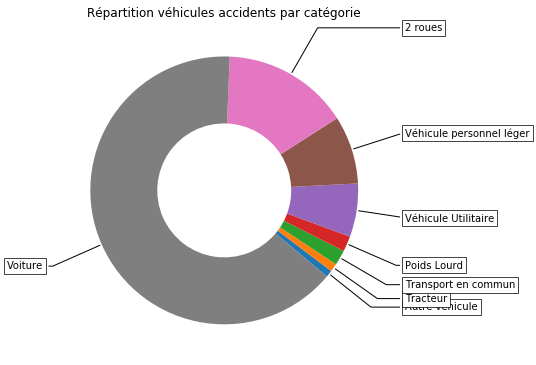

In [76]:
fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(aspect="equal"))

dataGcat = df.groupby(['gcat']).Num_Acc_Id.count().sort_values(ignore_index = False)
recipe = dataGcat.index

data = dataGcat.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Répartition véhicules accidents par catégorie")

plt.show()